Bacha: pohlídat audioknihy.
Bacha 2: filtrovat posmrtně vydané knihy.

In [2]:
import os
import re
import statistics
import pandas as pd

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [4]:
df = pd.read_parquet(os.path.join('data/cnb_sloupce','008.parquet'))

In [5]:
sloupce = ['leader','245','080','655','072','100','041','964']

In [6]:
for s in sloupce:
    pripojit = pd.read_parquet(os.path.join("data/cnb_sloupce",f"{s}.parquet"))
    df = df.merge(pripojit, left_index=True, right_index=True, how="left")

In [7]:
df.sample(30)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20091856430,090216s2008 xr g 000 d cze,nam a22 a 4500,1,0,"Maminka se vrátí, chudáčku sirotku /",None,Jean-Claude Grumberg ; [z francouzského origin...,None,None,None,None,None,None,"[821.133.1-2, (0:82-2)]","[MRF, MRF]",None,None,None,"[7, 9]","[francouzská dramata, French drama]","[fd132283, None]","[czenas, eczenas]",None,None,None,None,[7],[821.133.1-2],"[Francouzské drama, francouzsky psané]",[Konspekt],[25],1,"Grumberg, Jean-Claude,",xx0001025,[aut],1939-,None,None,None,None,1,[cze],[fre],None,None,None,None,None,None,None,None,None,None,None,NaN
cpz20233499727,230206q19451950xr mcnng n cze,njm a22 2i 4500,1,0,Polka specielně aktuelní :,z revue »Robin zbojník« : (1932) ; Na shledano...,hudba Jaroslav Ježek ; slova Voskovec + Werich,None,None,None,None,None,None,[(086.72)],[MRF],None,None,None,"[4, 7]","[standardní desky, gramofonové desky]","[None, fd186718]","[None, czenas]",None,None,None,None,[7],[782],"[Divadelní hudba. Opera, opereta, muzikál]",[Konspekt],[9],1,"Ježek, Jaroslav,",jk01051624,[cmp],1906-1942,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cps19980306352,980401c19979999xr qr p 0 0cze,nas a22 i 4500,0,0,Informační list obce Vnorovy,None,None,None,None,None,None,None,None,"[050, 32.019.5]","[MRF-sel, MRF-sel]",None,None,None,[7],[místní časopisy],[fd132900],[czenas],None,None,None,None,[7],[352/354],"[Stupně místní, oblastní a ústřední správy]",[Konspekt],[15],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nos190234916,001018s1908 xr ||| | cze,nam a22 1 4500,1,0,Směnka a šek vedle rak. zák. ze dne 3. dubna 1...,None,Naps. JUDr. Antonín Pavlíček,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Pavlíček, Antonín,",jk01092082,[aut],1838-1909,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ck8604413,861010s1986 xr a u0|0 | cze,nam a22 4500,0,0,Matematika I /,None,Stanislav Gabriel ... [et al.],None,None,None,None,None,None,"[512.64(075.8), 514.12(075.8), 514.742.2(075.8...","[undef, undef, undef, undef]",None,None,None,[7],[učebnice vysokých škol],[fd133772],[czenas],None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Matematika - učebnice vysokošk.]
cpk19990770791,991117s1999 xr a f 100 0 eng,nam a22 a 4500,0,0,Textile science for XXI century :,"international seminar, June 8-9 1999, Guimarãe...",organized by University of Minho in Portugal a...,None,None,None,None,None,None,"[677.01/.02, (062.534)]","[MRF, MRF]",None,None,None,"[7, 9]","[sborníky konferencí, proceedings of conferences]","[fd133333, None]","[czenas, eczenas]",None,None,None,None,[7],[677],[Textilní průmysl],[Konspekt],[19],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bk196303580,980119s1963 xr cze,nam a22 1 4500,1,0,Jasnější než tisíc sluncí :,Osudy atomových vědců /,Robert Jungk ; Z něm. orig. Heller als tausend...,None,None,None,None,None,None,"[539.001""19""+[92(100):539.007.1:830-32]",[undef],None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Jungk, Robert,",skuk0003313,[aut],1913-1994,None,None,None,None,1,[cze],"[ger, eng]",None,None,None,None,None,None,None,None,None,None,None,[Fyzika jaderná - dějiny]
bk194400592,990204s1944 xr 000 | cze,nam a22 1 4500,0,0,Hudební nauka pro mládež :,co má věděti každý hudebník a zpěvák /,sestavil František Horáček,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 1238228 entries, ck8300078 to nkc20243632953
Data columns (total 55 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   008       1238228 non-null  object
 1   leader    1238228 non-null  object
 2   245_ind1  1238217 non-null  object
 3   245_ind2  1238217 non-null  object
 4   245_a     1238228 non-null  object
 5   245_b     598792 non-null   object
 6   245_c     1022186 non-null  object
 7   245_n     76402 non-null    object
 8   245_p     58319 non-null    object
 9   245_h     149934 non-null   object
 10  245_f     18 non-null       object
 11  245_s     5 non-null        object
 12  245_v     1 non-null        object
 13  080_a     1017378 non-null  object
 14  080_2     1017378 non-null  object
 15  080_x     5 non-null        object
 16  080_9     1 non-null        object
 17  080_ind1  1 non-null        object
 18  655_ind2  883796 non-null   object
 19  655_a     883796 non-null   obje

In [9]:
df = df.explode('008')

In [10]:
def najdi_rok(nn8):
    if nn8[6] in ['s', 't', 'd', 'm', 'e', 'c','u', 'r']:
        try:
            return int(nn8[7:11])
        except Exception as e:
            return None
        else:
            return None
    elif nn8[6] == 'q':
        try:
            rok1 = int(nn8[7:11])
            rok2 = int(nn8[11:15])
            if rok2 - rok1 <= 5:
                return int(statistics.median([rok1, rok2]))
            else:
                return None
        except:
            return None
    else:
        return None

In [11]:
def najdi_zub(frame):
    try:
        print("Hledám zub mezi lety 1900 a 1901.")
        nula = len(frame[frame['rok'] == 1900])
        jedna = len(frame[frame['rok'] == 1901])
        print(f"1900: {nula}, 1901: {jedna}, poměr: {nula / jedna}")
    except Exception as E:
        print(E)

In [12]:
def r(x):
    return x.groupby('rok').size().plot.bar(figsize=(25,5))

In [13]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [14]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1990, 1901: 2246, poměr: 0.8860195903829029


<Axes: xlabel='rok'>

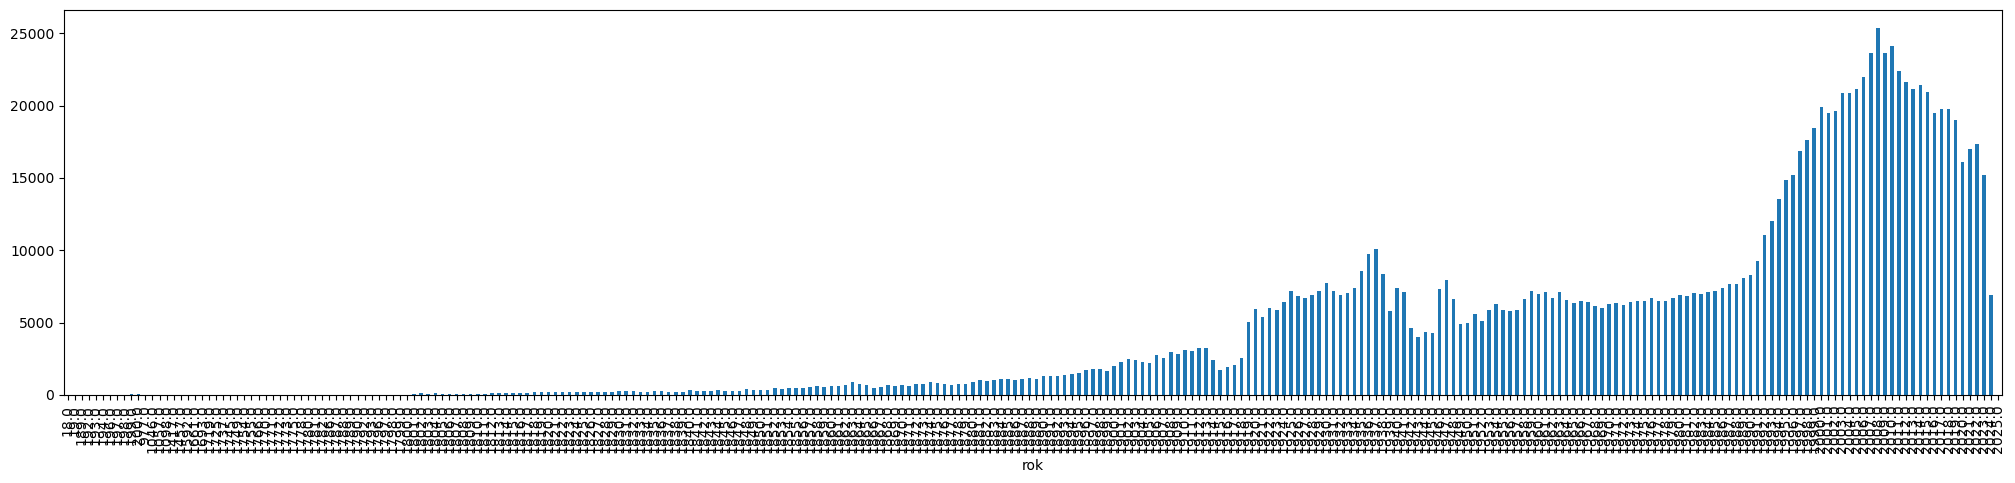

In [15]:
r(df)

In [16]:
df[df['100_a'].astype(str).str.contains('Lednická, Karin',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpz20203232647,200625t20202020xr nnnng f n cze,nim a22 i 4500,1,0,Šikmý kostel /,None,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,1,0,Šikmý kostel :,románová kronika ztraceného města /,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
cpz20213379057,211213t20212021xr nnnng f n cze,nim a22 i 4500,1,0,Šikmý kostel.,None,Karin Lednická,"[Druhý díl,]",[Léta 1921-1945 /],None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,"[aut, nrt]",1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
nkc20223403237,220322s2022 xr ach g 000 f cze,nam a22 i 4500,1,0,Životice :,obraz (po)zapomenuté tragédie /,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 9, 9, 9]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
nkc20223472496,221116s2022 xr g 000 f eng,nam a22 i 4500,1,4,The leaning church :,chronicle of a town that vanished: 1894-1921 /,Karin Lednická ; English translation: Pavlína ...,None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6)]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,1,[eng],[cze],None,None,None,None,None,None,None,None,None,None,None,NaN,2022.0
cpz20233520279,230512t20232022xr nnnng fz n cze,nim a22 i 4500,1,0,Životice :,obraz (po)zapomenuté tragédie /,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7, 7]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, fd119452, fd20...","[czenas, czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,"[aut, nrt]",1969-,

In [17]:
df = df[(df["008"].str[15:17] == "xr") & (df["008"].str[35:38] == "cze")]

In [18]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1528, 1901: 1974, poměr: 0.7740628166160081


<Axes: xlabel='rok'>

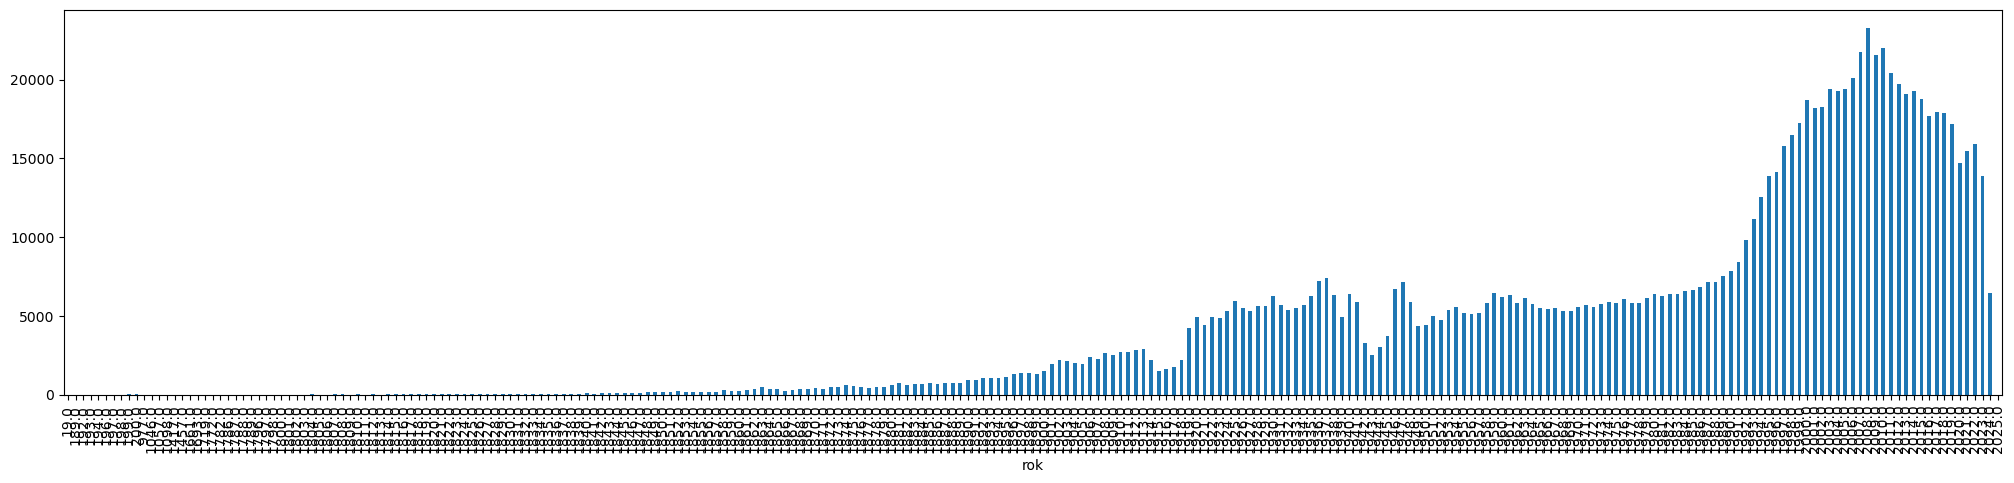

In [19]:
r(df)

In [20]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 1080979 entries, ck8300078 to cpk20243632941
Data columns (total 56 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   008       1080979 non-null  object 
 1   leader    1080979 non-null  object 
 2   245_ind1  1080976 non-null  object 
 3   245_ind2  1080977 non-null  object 
 4   245_a     1080979 non-null  object 
 5   245_b     515211 non-null   object 
 6   245_c     896702 non-null   object 
 7   245_n     65612 non-null    object 
 8   245_p     52724 non-null    object 
 9   245_h     115250 non-null   object 
 10  245_f     16 non-null       object 
 11  245_s     4 non-null        object 
 12  245_v     1 non-null        object 
 13  080_a     898079 non-null   object 
 14  080_2     898079 non-null   object 
 15  080_x     5 non-null        object 
 16  080_9     1 non-null        object 
 17  080_ind1  1 non-null        object 
 18  655_ind2  777138 non-null   object 
 19  655_a     7

In [21]:
df.sample(30)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20031251859,030630s2003 xr e 001 0 cze,nam a22 a 4500,1,0,Podmínky volby /,None,Zdeněk Vašíček,None,None,None,None,None,None,"[161.1, 81:1, 82.0, (0:82-4)]","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 9]","[eseje, essays]","[fd132213, None]","[czenas, eczenas]",None,None,None,None,"[7, 7]","[81, 101]","[Lingvistika. Jazyky, Filozofie]","[Konspekt, Konspekt]","[11, 5]",1,"Vašíček, Zdeněk,",jk01141688,[aut],1933-2011,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0
nkc20142624181,140912s2014 xr a b 000 0 cze,nam a22 a 4500,1,0,Klárka - malá lízátková víla :,oblékni Klárku a její kamarádky /,[ilustrace Lara Ede],None,None,None,None,None,None,"[821-93, (076.1), (084.1.029.2)]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 9, 9, 9]","[pracovní sešity, samolepky, publikace pro dět...","[fd133116, fd119297, fd133156, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,[7],[821-93],[Literatura pro děti a mládež (beletrie)],[Konspekt],[26],1,"Ede, Lara",mzk2012716531,[ill],None,None,None,None,None,1,[cze],[eng],None,None,None,None,None,None,None,None,None,None,None,NaN,2014.0
nkc20172907932,170711s2017 xr e f 000 0 cze,nam a22 i 4500,1,0,7 + 1 myšlenka /,None,Vlastislav Macík,None,None,None,None,None,None,"[159.923.5, 005.214, 17.02, (0.062)]","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 9]","[populárně-naučné publikace, popular works]","[fd131864, None]","[czenas, eczenas]",None,None,None,None,[7],[159.92],[Vývojová psychologie. Individuální psychologie],[Konspekt],[17],1,"Macík, Vlastislav,",ola2013764220,[aut],1976-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0
ck8502352,850326s1983 xr u0|0 | cze,nam a22 4500,1,0,Hospodaření na vodních nádržích a vodních tocí...,None,Bohumil Müller,None,None,None,None,None,None,"[627.8, 628.132, 556.18]","[undef, undef, undef]",None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Müller, Bohumil,",jk01082399,[aut],-1981,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983.0
nkc20213369045,211026s2021 xr e 000 0bcze d,cam a22 i 4500,1,0,29.7.1856 - smrt Karla Havlíčka Borovského :,legenda o brixenském mučedníkovi v proměnách č...,Michael Borovička,None,None,None,None,None,None,"[821.162.3-051, 070.42, 82:316.3, 82:32, 323, ...","[MRF, MRF, MRF, MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[biografie, literatura faktu, biography, non-f...","[fd131909, fd132773, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,"[7, 7]","[070, 929]","[Noviny. Tisk. Žurnalistika, Biografie]","[Konspekt, Konspekt]","[12, 8]",1,"Borovička, Michael,",jn19990209065,[aut],1951-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
cpk20041308680,040430s2004 xr e 000 1 cze,nam a22 a 4500,1,0,Třináctý učedník /,None,Larry H. Robinson ; [z německého originálu ......,None,None,None,None,None,None,"[821.112.2-31, (0:82-311.9)]","[MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[vědecko-fantastické romány, německy psané rom...","[fd133847, fd132937, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.112.2-3],"[Německá próza, německy psaná]",[Konspekt],[25],1,"Robinson, Larry H.,",xx0018568,[aut],1936-,None,None,None,None,1,[cze],[ger],None,None,None,None,None,None,None,None,None,None,None,NaN,2004.0
bk193802222,990315s1938 xr ||| | cze,nam a22 1 4500,1,0,Moudří manželé? /,None,[Rudolf Schikora],None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [22]:
df[df['100_a'].astype(str).str.contains('Lednická, Karin',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpz20203232647,200625t20202020xr nnnng f n cze,nim a22 i 4500,1,0,Šikmý kostel /,None,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,1,0,Šikmý kostel :,románová kronika ztraceného města /,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
cpz20213379057,211213t20212021xr nnnng f n cze,nim a22 i 4500,1,0,Šikmý kostel.,None,Karin Lednická,"[Druhý díl,]",[Léta 1921-1945 /],None,None,None,None,"[821.162.3-31, 94(437.326), (0:82-311.6), (086...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7]","[české romány, historické romány, audioknihy, ...","[fd133974, fd132414, fd119452, fd201991]","[czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,"[aut, nrt]",1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0
nkc20223403237,220322s2022 xr ach g 000 f cze,nam a22 i 4500,1,0,Životice :,obraz (po)zapomenuté tragédie /,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 9, 9, 9]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0
cpz20233520279,230512t20232022xr nnnng fz n cze,nim a22 i 4500,1,0,Životice :,obraz (po)zapomenuté tragédie /,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326)""1944"", (0:82-96), (...","[MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 7, 7]","[literatura faktu, české romány, dokumentární ...","[fd132773, fd133974, fd1044289, fd119452, fd20...","[czenas, czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,"[aut, nrt]",1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0


In [23]:
df = df.explode("leader")

In [24]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1528, 1901: 1974, poměr: 0.7740628166160081


<Axes: xlabel='rok'>

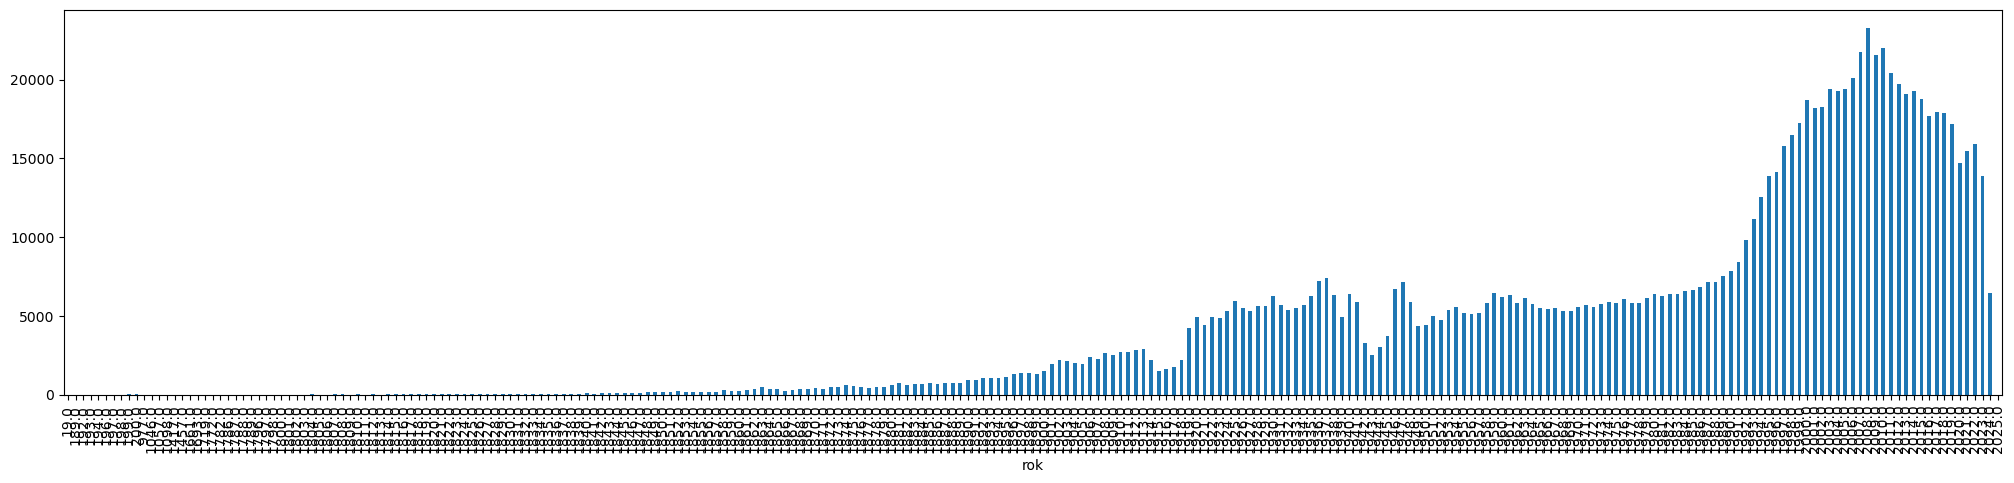

In [25]:
r(df)

In [26]:
df = df[df["leader"].str[6].isin(["a", "t"])]

In [27]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1489, 1901: 1936, poměr: 0.7691115702479339


<Axes: xlabel='rok'>

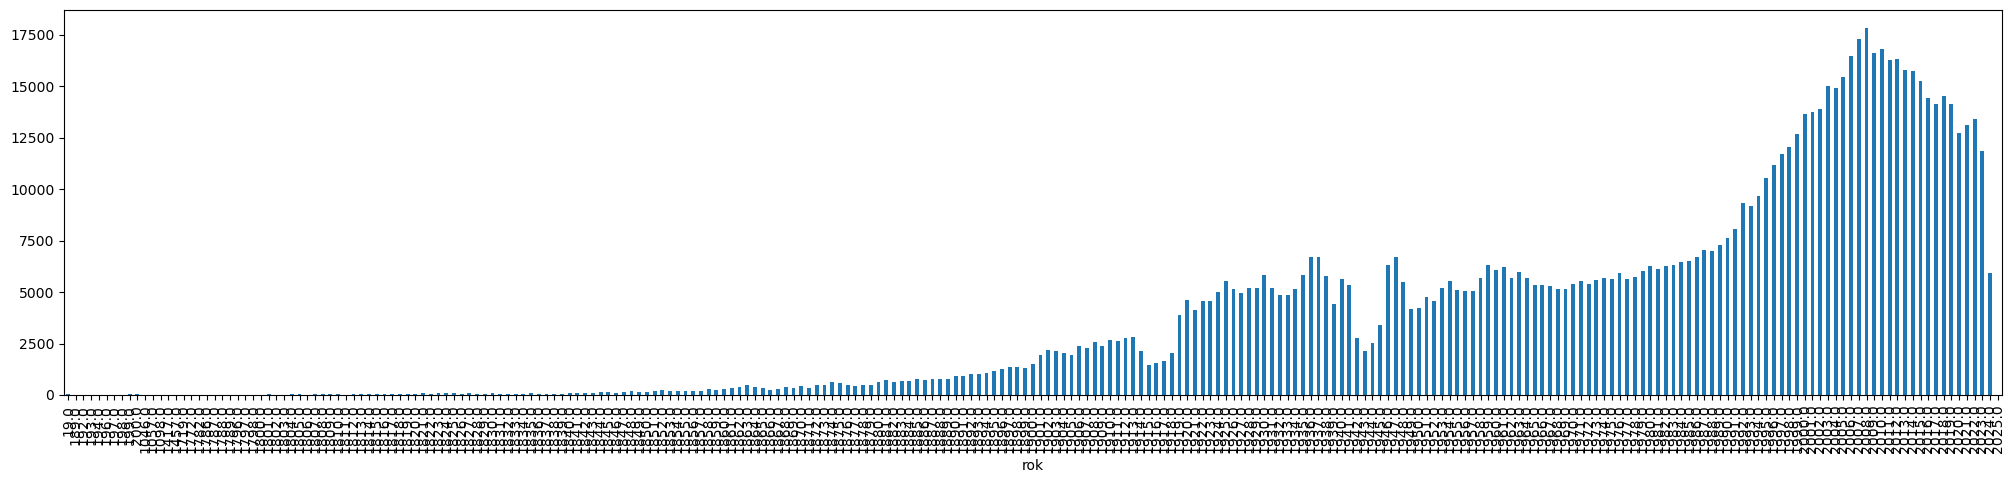

In [28]:
r(df)

In [29]:
df[df['245_a'].astype(str).str.contains('Šikmý kostel',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20213304795,210129m20202024xr ahf g 000 f cze,nam a22 ia4500,1,0,Šikmý kostel :,románová kronika ztraceného města /,Karin Lednická,None,None,None,None,None,None,"[821.162.3-31, 94(437.326), (437.326), (0:82-3...","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, historické romány, Czech fictio...","[fd133974, fd132414, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Lednická, Karin,",ola2007364650,[aut],1969-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0


In [30]:
df = df[~df["leader"].str[7].isin(["b", "i", "s", " "])]

In [31]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1377, 1901: 1821, poměr: 0.7561779242174629


<Axes: xlabel='rok'>

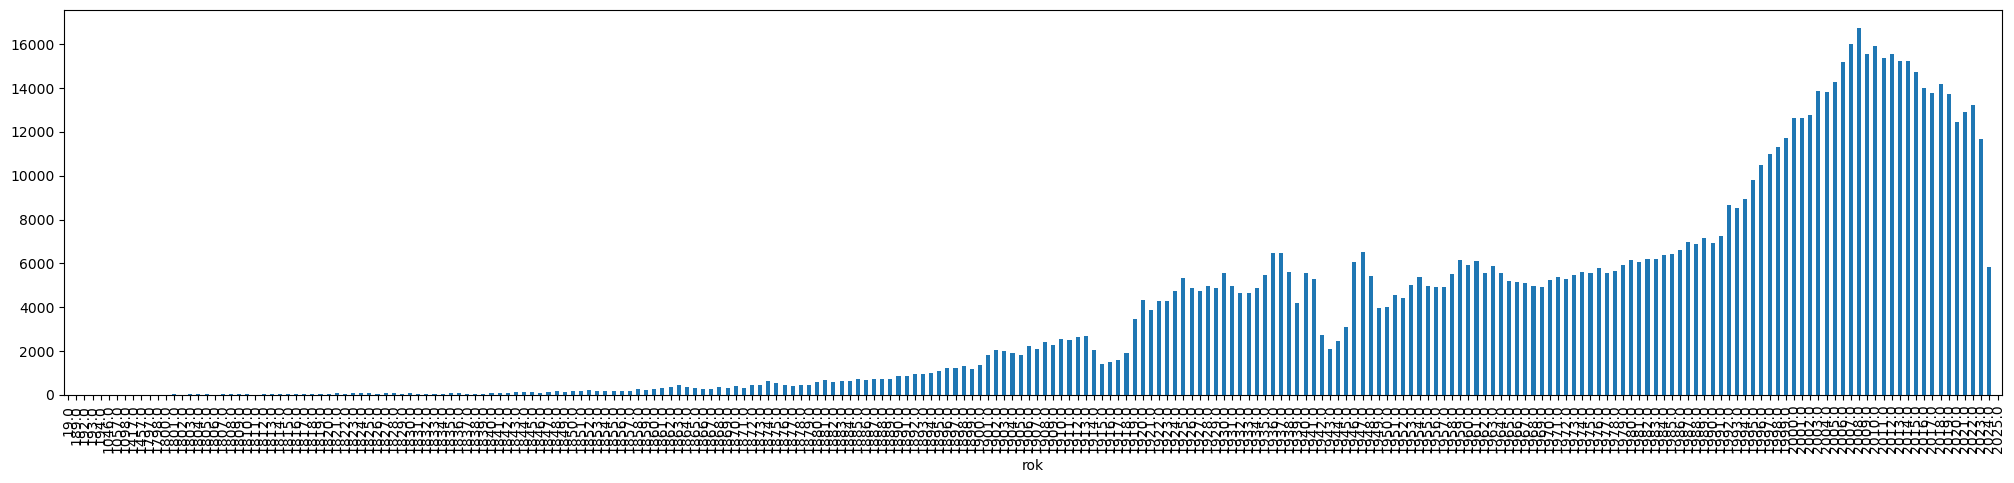

In [32]:
r(df)

In [33]:
df = df.dropna(subset=["rok"])

In [34]:
najdi_zub(df)

Hledám zub mezi lety 1900 a 1901.
1900: 1377, 1901: 1821, poměr: 0.7561779242174629


<Axes: xlabel='rok'>

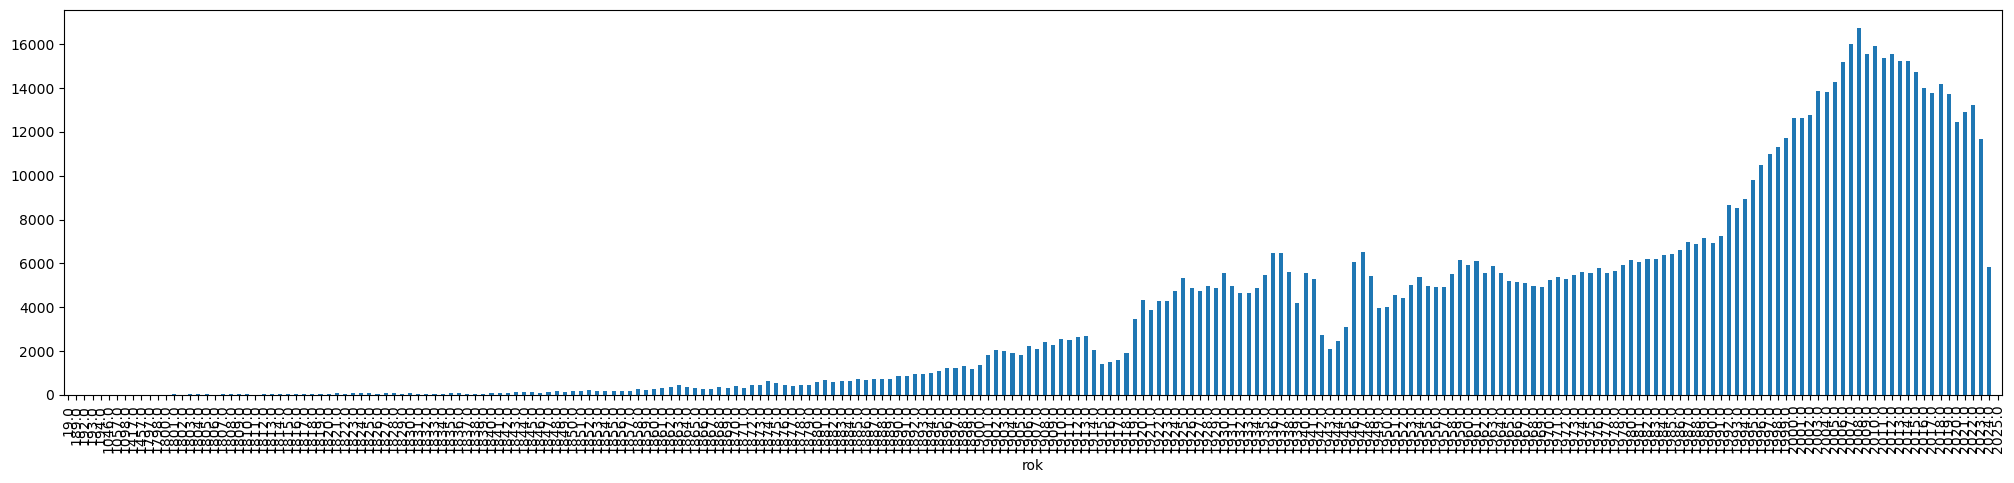

In [35]:
r(df)

In [36]:
df['245_a'].sample(50)

001
nos190122980                                      Žebřík vodorovný /
nkc20182998445            20 let Česko-německého fondu budoucnosti =
nkc20142537904                             Úvod do užité geofyziky /
bk194300836                  Pohon automobilů generátorovým plynem /
bkn20021120943                              Poslední dnové lidstva :
bk195904527                                   Kapitolky o broucích /
nos190245657                                           Bilancování /
bk197101144        Inženýrsko-fyzikální výpočet jaderných reaktorů /
bk195704760                       Liberecký kraj očima spisovatelů :
nkc20081804361                                     Křišťálový drak /
bk198003143                               Bledě modré ženské písmo /
bk192902228                           Andrej Sládkovič a jeho doba :
cpk19990643212     Vybrané kapitoly z pediatrie pro studující ZSF...
bk196703154                                        Život s hvězdou /
bk195204062                   

In [37]:
df.sample(10)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20172892768,170411s2017 xr a e 6 000 1 cze,nam a22 i 4500,1,0,Mýty.,None,"Bill Willingham - scénář ; Mark Buckingham, St...",None,[Válka a střepy /],None,None,None,None,"[821-312.5, (084.1)]","[MRF, MRF]",None,None,None,"[7, 9]","[komiksy, comics]","[fd131978, None]","[czenas, eczenas]",None,None,None,None,[7],[821-31/-34],"[Milostná, dobrodružná, fantastická próza]",[Konspekt],[25],1,"Willingham, Bill,",kv2008437704,[aut],1956-,None,None,None,None,1,[cze],[eng],None,None,None,None,None,None,None,None,None,None,None,NaN,2017.0
cpk20010888074,010123s2000 xr e 000 j cze,cam a22 a 4500,1,0,Poškozené buňky /,None,Hubert Haensel ; přeložil Hugo Bokvas,None,None,None,None,None,None,[82-312.5],[MRF],None,None,None,"[7, 9]","[vědecko-fantastické povídky, Science fiction]","[fd133845, None]","[czenas, eczenas]",None,None,None,None,[7],[821-31/-34],"[Milostná, dobrodružná, fantastická próza]",[Konspekt],[25],1,"Haensel, Hubert,",jn19990003052,[aut],1952-,None,None,None,None,1,[cze],[ger],None,None,None,None,None,None,None,None,None,None,None,NaN,2000.0
bk193600269,990126s1936 xr 000 cze,nam a22 1a 4500,1,0,Descartesova metoda ve vědách a ve filosofii /,None,napsal Josef Beneš,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Beneš, Josef,",jk01011605,[aut],1901-1970,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1936.0
nkc20092008794,100407s2009 xr a f m 000 0 cze,nam a22 a 4500,1,0,Škálovatelné metody rozložení oblasti k řešení...,Scalable domain decomposition methods for solu...,Alexandros Markopoulos,None,None,None,None,None,None,"[531.21/.25, 519.876.5, (043.3)378.245, (048.3)]","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[doktorské disertace, autoreferáty, higher doc...","[fd186751, fd131857, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[531],[Obecná mechanika. Mechanika pevných a tuhých ...,[Konspekt],[6],1,"Markopoulos, Alexandros,",mzk2010568429,[dis],1981-2020,None,None,None,None,0,[cze],None,[eng],None,None,None,None,None,None,None,None,None,None,NaN,2009.0
bk196902159,971005s1969 xr e 000 j cze,nam a22 1a 4500,1,0,Černé jako smola :,detektivní povídky /,Hana Prošková,None,None,None,None,None,None,"[821.162.3-32, (0:82-322.4)]","[MRF, MRF]",None,None,None,"[7, 7]","[české povídky, detektivní povídky]","[fd133971, fd132008]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Prošková, Hana,",jk01101381,[aut],1924-2002,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969.0
nos190102081,000616s1920 xr cze,nam a22 1 4500,1,0,Radost z práce :,Kázání pod širým nebem /,Alexandr Sommer Batěk,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Batěk, Alexandr,",jk01011106,[aut],1874-1944,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1920.0
nkc20162840225,161011s2016 xr a g f 000 0 cze,nam a22 i 4500,1,0,Velká kniha originálních nápadů :,nejlepší projekty od autorky bestsellerů /,Lucie Dvořáková,None,None,None,None,None,None,"[745, 688.78/.79, (035), (084.11)]","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[příručky, obrazové publikace, handbooks and m...","[fd133209, fd132947, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[74],[Kresba. Umělecká řemesla],[Konspekt],[21],1,"Dvořáková, Lucie,",xx0116082,[aut],1977-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.0
ck89008

In [104]:
df = df.dropna(subset=['245_a','100_a'])
najdi_zub(df)
df['titul'] = df['245_a'].apply(lambda x: x[:-1].strip() if x[-1] in [':','/',';','=','.'] else x.strip())

Hledám zub mezi lety 1900 a 1901.
1900: 1194, 1901: 1530, poměr: 0.7803921568627451


<Axes: xlabel='rok'>

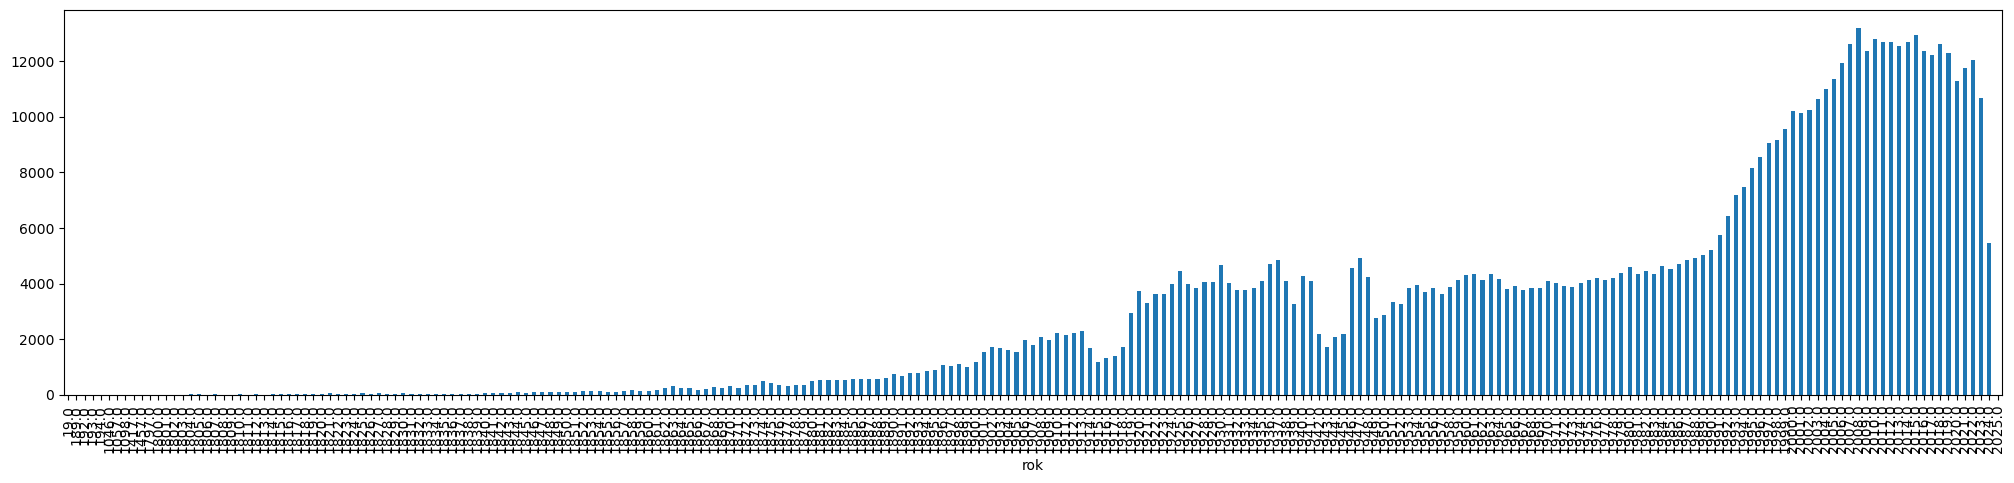

In [39]:
r(df)

## Kontroly divných věcí ze sešitu 112

In [41]:
df[df['245_a'].astype(str).str.contains('Malíř Láďa Rákos')]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## Hledání zubu

In [43]:
najdi_zub(df[df['072_x'].astype(str).str.lower().str.contains('česká próza',na=False)])

Hledám zub mezi lety 1900 a 1901.
1900: 134, 1901: 62, poměr: 2.161290322580645


In [44]:
najdi_zub(df[df['072_a'].astype(str).str.lower().str.contains('821.162.3-3',na=False)])

Hledám zub mezi lety 1900 a 1901.
1900: 134, 1901: 62, poměr: 2.161290322580645


In [45]:
najdi_zub(df[df['080_a'].astype(str).str.contains('821.162.3-3',na=False)])

Hledám zub mezi lety 1900 a 1901.
1900: 131, 1901: 59, poměr: 2.2203389830508473


In [46]:
najdi_zub(df[df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)])

C:\Users\micha\AppData\Local\Temp\ipykernel_23068\3818377305.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  najdi_zub(df[df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)])


Hledám zub mezi lety 1900 a 1901.
1900: 125, 1901: 52, poměr: 2.4038461538461537


In [47]:
najdi_zub(df[(df['080_a'].astype(str).str.contains('885',na=False) & df['080_a'].astype(str).str.contains('82-3',na=False) & ~df['964_a'].astype(str).str.lower().str.contains('hry',na=False) & ~df['072_x'].astype(str).str.lower().str.contains('české drama',na=False))])

Hledám zub mezi lety 1900 a 1901.
division by zero


In [48]:
najdi_zub(df[df['080_a'].astype(str).str.contains('885-321.')])

Hledám zub mezi lety 1900 a 1901.
division by zero


In [49]:
najdi_zub(df[df['080_a'].astype(str).str.contains('885.0-31',na=False)])

Hledám zub mezi lety 1900 a 1901.
1900: 1, 1901: 1, poměr: 1.0


In [50]:
najdi_zub(df[((df['008'].str[33] == '1') & (df['041_h'].isnull()))])

Hledám zub mezi lety 1900 a 1901.
1900: 69, 1901: 36, poměr: 1.9166666666666667


## Finální export

In [52]:
najdi_zub(df)
ceska_proza = df[
    df['072_x'].astype(str).str.lower().str.contains('česká próza',na=False)
    | df['072_a'].astype(str).str.lower().str.contains('821.162.3-3',na=False)
    | df['080_a'].astype(str).str.contains('821.162.3-3',na=False)
    | df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)
    | (df['080_a'].astype(str).str.contains('885',na=False) & df['080_a'].astype(str).str.contains('82-3',na=False) & ~df['964_a'].astype(str).str.lower().str.contains('hry',na=False) & ~df['072_x'].astype(str).str.lower().str.contains('české drama',na=False))
    | df['080_a'].astype(str).str.contains('885-321.')
    | df['080_a'].astype(str).str.contains('885.0-31',na=False)
    | ((df['008'].str[33] == '1') & (df['041_h'].isnull()))
]
najdi_zub(ceska_proza)
ceska_proza = ceska_proza[ceska_proza['100_a'].notnull()]
najdi_zub(ceska_proza)
ceska_proza['autorstvo'] = ceska_proza['100_a'].apply(lambda x: x.replace(',','').strip() if x != None else None)
ceska_proza['autorstvo_kod'] = ceska_proza['100_7']
ceska_proza2 = ceska_proza.sort_values(by='rok').drop_duplicates(subset=['titul','autorstvo'], keep='first')

Hledám zub mezi lety 1900 a 1901.
1900: 1194, 1901: 1530, poměr: 0.7803921568627451


C:\Users\micha\AppData\Local\Temp\ipykernel_23068\1426422352.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  | df['655_a'].astype(str).str.lower().str.contains(r'české (romány|prózy|novely|povídky)', na=False)


Hledám zub mezi lety 1900 a 1901.
1900: 187, 1901: 83, poměr: 2.253012048192771
Hledám zub mezi lety 1900 a 1901.
1900: 187, 1901: 83, poměr: 2.253012048192771


In [53]:
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].sample(20)

,rok,titul,autorstvo,autorstvo_kod
001,,,,
nkc20233564230,2022.0,Památkové aforismy,Hudec Petr,mzk2015896515
nkc20102125403,2010.0,Ať žijí rytíři!,Březinová Ivona,jn19990218010
nkc20233555002,2023.0,O kapku víc,Tutschová Mariana,xx0217326
cpk20041296169,2004.0,Prohraná sázka,Kratochvílová Jana,xx0009867
nkc20102116498,2010.0,Soukromé bludiště,Fieber Michal,mzk2004148337
nkc20122411364,2012.0,Album,Malchárková Anna,ola2006329856
nkc20203245028,1929.0,Sestry,Kyzlinková Marie,jk01071325
nkc20102130618,2010.0,"Slečny, valchaři a intriky v showbusinessu",Drobný Milan,jn20000400549
nkc20213277737,2020.0,Jak napravovat svět,Dubinová Terezie,xx0057917


<Axes: xlabel='rok'>

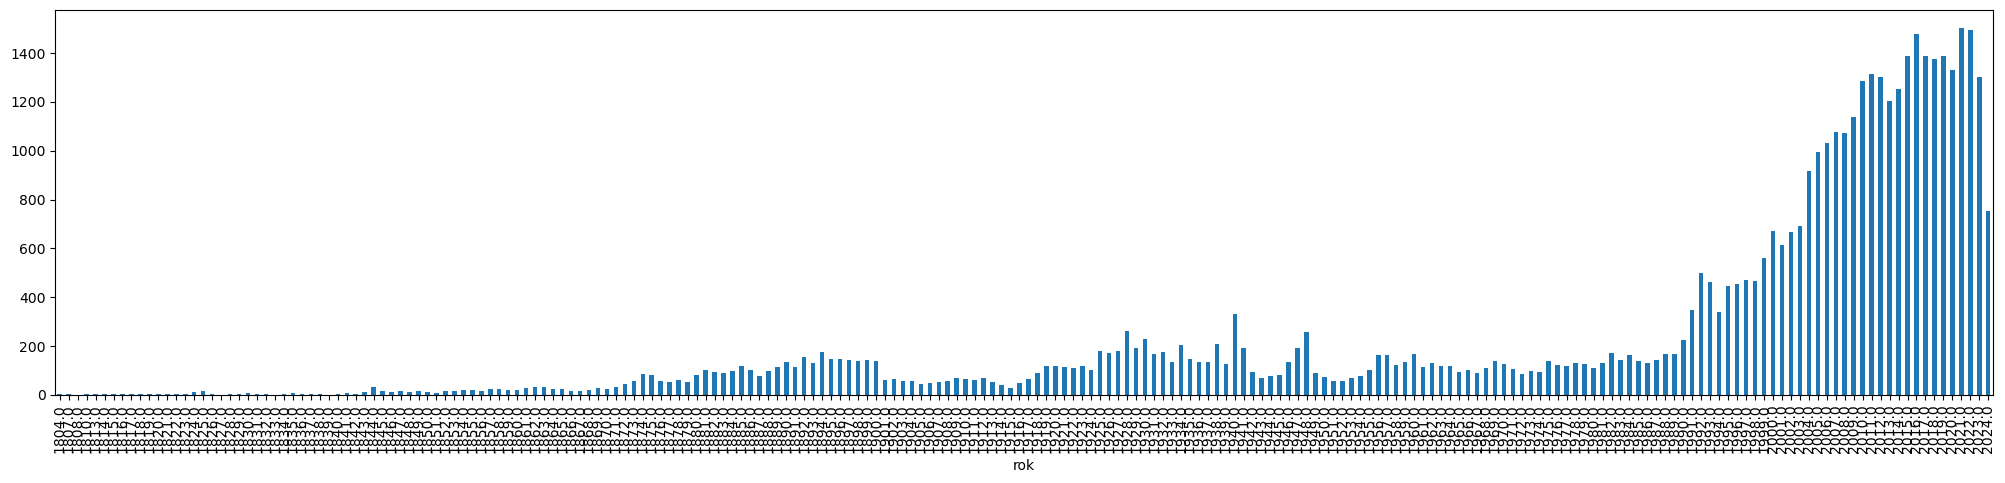

In [54]:
r(ceska_proza2)

In [55]:
ceska_proza2[ceska_proza2['rok'] == 1890].sample(20)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bknaus11357,020526s1890 xr f ||| 1 cze,nam a22 1 4500,1,0,Poklad v zámku jindřichohradeckém :,Hist. pověsť ze 17. stol. /,Naps. Blahomír Šimon Třebický,None,None,None,None,None,None,"[821.162.3-32, (0:82-32), (0:82-34)]","[MRF, MRF, MRF]",None,None,None,"[7, 7]","[české příběhy, pověsti]","[fd133973, fd133104]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Třebický, Blahomír Šimon",None,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Poklad v zámku jindřichohradeckém,Třebický Blahomír Šimon,None
bknhra02998,040811s1890 xr j 000 j cze,nam a22 1a 4500,1,0,Strýc Petr ;,Teta Marta : dva příběhy ze života /,vypravuje Fr. A. Zeman,None,None,None,None,None,None,"[821-93, 821.162.3-32, (0:82-32)]","[MRF, MRF, MRF]",None,None,None,"[7, 7]","[české povídky, publikace pro mládež]","[fd133971, fd133157]","[czenas, czenas]",None,None,None,None,"[7, 7]","[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[Konspekt, Konspekt]","[25, 26]",1,"Zeman, František Antonín,",jk01152457,[aut],1838-1916,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Strýc Petr,Zeman František Antonín,jk01152457
bknmik04325,020318s1890 xr e j cze,nam a22 1 4500,1,0,Slanské obrázky :,historické povídky /,od Koldy Malínského [pseud.],None,None,None,None,None,None,"[821.162.3-32, (437.312), (0:82-321.6)]","[MRF, MRF, MRF]",None,None,None,"[7, 7]","[české povídky, historické povídky]","[fd133971, fd132412]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Malínský, Kolda,",jk01073268,[aut],1850-1908,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Slanské obrázky,Malínský Kolda,jk01073268
bknzdr16205,021108s1890 xr e 000 j cze,nam a22 a 4500,1,0,Čtyři povídky /,None,Božena Kunětická,None,None,None,None,None,None,"[821.162.3-32, (0:82-32)]","[MRF, MRF]",None,None,None,[7],[české povídky],[fd133971],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Viková-Kunětická, Božena,",jk01142347,[aut],1862-1934,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Čtyři povídky,Viková-Kunětická Božena,jk01142347
cpk20021160683,020624s1890 xr e 000 j cze,nam a22 a 4500,1,0,Růženka :,obraz z města v druhé polovici 19. století /,od E.B.,None,None,None,None,None,None,[821.162.3-32],[MRF],None,None,None,[7],[české povídky],[fd133971],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Brynych, Edvard Jan Nepomucký,",jk01013358,[aut],1846-1902,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Růženka,Brynych Edvard Jan Nepomucký,jk01013358
bknjaj00007,010902s1890 xr e 000 f cze,nam a22 a 4500,1,0,Kněz a student /,None,od Aloisa Hořického,None,None,None,None,None,None,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,None,[7],[české prózy],[fd133972],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Adlof, Alois,",jk01010124,[aut],1861-1927,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1890.0,Kněz a student,Adlof Alois,jk01010124
cpk20031289077,031021s1890 xr b 000 j cze,nam a22 a 4500,1,0,Tři malé povídky /,None,naší mládeži vypravuje Jan Kozel,None,None,None,None,None,None,"[821-93, 821.162.3-32, (0:82-321.7)]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 7]","[didaktické povídky, publikace pro mládež, čes...","[fd165100, fd133

In [56]:
len(ceska_proza2)

47419

In [57]:
ceska_proza2.sample(20)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ck8305390,831122s1983 xr 0|1 1 cze,nam a22 4500,1,0,Baletní libreta :,České a slovenské balety /,Vladimír Vašut,None,None,None,None,None,None,[792.8],[undef],None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[7],[782],"[Divadelní hudba. Opera, opereta, muzikál]",[Konspekt],[9],1,"Vašut, Vladimír,",jk01141702,[aut],1931-2017,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Balety české - balety slovenské - libreta],1983.0,Baletní libreta,Vašut Vladimír,jk01141702
nkc20243606225,240523s2024 xr a g 000 j cze,nam a22 i 4500,1,0,Svatý týden /,None,Michael Trn,None,None,None,None,None,None,"[821.162.3-32, (0:82-32)]","[MRF, MRF]",None,None,None,"[7, 9]","[české novely, Czech novellas]","[fd133969, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Trn, Michael",xx0318343,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Svatý týden,Trn Michael,xx0318343
nkc20223416974,220413s2022 xr a a 000 1 cze,nam a22 i 4500,1,0,Domácí zvířátka /,None,Petra Z. Jelen,None,None,None,None,None,None,"[821-93-053.4, 636.1/.9, (0.025.2)]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[publikace pro nejmenší děti, leporela, public...","[fd1060157, fd132727, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821-93-053.4],[Literatura pro nejmenší děti],[Konspekt],[26],1,"Jelenová, Petra,",jn20001227677,"[aut, ill]",1974-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,Domácí zvířátka,Jelenová Petra,jn20001227677
bk192902500,991119s1928 xr af b 000 f cze,nam a22 i 4500,1,0,Nová kytka pohádek /,None,mládeži napsal Jos. Š. Kubín ; ilustroval Art....,None,None,None,None,None,None,"[821-93, 821.162.3-34, (0:82-34)]","[MRF, MRF, MRF]",None,None,None,"[7, 7]","[české pohádky, publikace pro děti]","[fd133970, fd133156]","[czenas, czenas]",None,None,None,None,"[7, 7]","[821-93, 821.162.3-3]","[Literatura pro děti a mládež (beletrie), Česk...","[Konspekt, Konspekt]","[26, 25]",1,"Kubín, Josef Štefan,",jk01070421,[aut],1864-1965,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1928.0,Nová kytka pohádek,Kubín Josef Štefan,jk01070421
nkc20182981394,180222s2018 xr a b 000 j cze,nam a22 i 4500,1,0,Případ: detektivové a narozeninový případ /,None,pachatel: Zuzana Pospíšilová ; policejní ident...,None,None,None,None,None,None,"[821.162.3-32, 821-93, (0:82-322.4)]","[MRF, MRF, MRF]",None,None,None,"[7, 7, 7, 9, 9, 9]","[české příběhy, detektivní příběhy, publikace ...","[fd133973, fd132009, fd133156, None, None, None]","[czenas, czenas, czenas, eczenas, eczenas, ecz...",None,None,None,None,"[7, 7]","[821.162.3-3, 821-93]","[Česká próza, Literatura pro děti a mládež (be...","[Konspekt, Konspekt]","[25, 26]",1,"Pospíšilová, Zuzana,",mzk2006331486,[aut],1975-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,Případ: detektivové a narozeninový případ,Pospíšilová Zuzana,mzk2006331486
nkc20152693207,150413m19411946xr g 000 0 cze,nam a22 aa4500,1,0,Z mé staré zlaté Prahy :,"vzpomínky, povídky, klepy, žerty /",Karel Vika,None,None,None,None,None,None,"[821.162.3-32, (437.311), (0:82-32)]","[MRF, MRF, MRF]",None,None,None,[7],[české příběhy],[fd133973],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Vika, Karel,",jk01142341,[aut],1875-1941,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941.0,Z mé staré zlaté Prahy,Vika Ka

In [58]:
ceska_proza2[ceska_proza2['autorstvo'] == 'Němcová Božena']

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20122433977,121221m18451848xr g 000 f cze,nam a22 ia4500,1,0,Národní báchorky a powěsti /,None,od Boženy Němcowé,None,None,None,None,None,None,"[821.162.3-34, (0:82-34)]","[MRF, MRF]",None,None,None,[7],[české pohádky],[fd133970],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1845.0,Národní báchorky a powěsti,Němcová Božena,jk01083016
cpk20223420309,220509m18541855xr g 000 f cze,nam a22 ia4500,1,0,Národní Báchorky a Pověsti od Boženy Němcové,None,None,None,None,None,None,None,None,"[821.162.3-34, (0:82-34)]","[MRF, MRF]",None,None,None,"[7, 7]","[české pověsti, české pohádky]","[fd201456, fd133970]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1854.0,Národní Báchorky a Pověsti od Boženy Němcové,Němcová Božena,jk01083016
bknhak08992,030516s1855 xr e 000 f cze,nam a22 a 4500,1,0,Babička :,obrazy venkovského života /,od Boženy Němcové,None,None,None,None,None,None,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,None,"[7, 9]","[české prózy, Czech prose]","[fd133972, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1855.0,Babička,Němcová Božena,jk01083016
cpk20132502523,131002s1856 xr 000 1 cze,nam a22 aa4500,1,0,Pohorská vesnice :,povídka ze života lidu venkovského /,od Boženy Němcové,None,None,None,None,None,None,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,None,"[7, 9]","[české prózy, Czech prose]","[fd133972, None]","[czenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1856.0,Pohorská vesnice,Němcová Božena,jk01083016
bknhak09084,030517m18571858xr e 000 1 cze,nam a22 1 4500,1,0,Slovenské pohádky a pověsti.,None,od Boženy Němcové,[Sv. I-X /],None,None,None,None,None,"[821.162.4-34, (0:82-34)]","[MRF, MRF]",None,None,None,"[7, 7]","[slovenské pohádky, slovenské pověsti]","[fd133448, fd219004]","[czenas, czenas]",None,None,None,None,[7],[821.162.4],[Slovenská literatura],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1857.0,Slovenské pohádky a pověsti.,Němcová Božena,jk01083016
nkc20061643751,060220s1862 xr g 000 m cze,nam a22 a 4500,1,0,Chýže pod horami :,obrázek ze Slovenska ; O dvanácti měsíčkách : ...,od Boženy Němcové,None,None,None,None,None,None,"[821.162.3-32, 821.162.4-34]","[MRF, MRF]",None,None,None,"[7, 7]","[české povídky, slovenské pohádky]","[fd133971, fd133448]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk01083016,[aut],1820-1862,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1862.0,Chýže pod horami,Němcová Božena,jk01083016
cpk20132447922,130320s1862 xr e 000 j cze,nam a22 aa4500,1,0,Drobné povídky /,None,od Boženy Němcové,None,None,None,None,None,None,[821.162.3-32],[MRF],None,None,None,[7],[české povídky],[fd133971],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Němcová, Božena,",jk0

In [59]:
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].to_json(os.path.join("data","cnb_ceska_proza.json"), orient="index", indent=4)
ceska_proza2[['rok','titul','autorstvo','autorstvo_kod']].to_parquet(os.path.join("data","cnb_ceska_proza.parquet"))

In [60]:
ceska_proza2[ceska_proza2['rok'] == 2024].sort_values(by='008', key=lambda x: x.str[:6], ascending=False)

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,080_a,080_2,080_x,080_9,080_ind1,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,rok,titul,autorstvo,autorstvo_kod
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
nkc20243632920,240923s2024 xr a 000 1 cze,nam a22 i 4500,1,0,Moje obří strašilka /,None,napsala Jana Burešová ; ilustroval Jakub Dvořák,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Burešová, Jana",xx0223719,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Moje obří strašilka,Burešová Jana,xx0223719
nkc20243632045,240923s2024 xr g 000 f cze,nam a22 i 4500,1,0,Ve výslužbě.,None,Martin Goffa,None,"[Zmizelá, aneb, První poslední případ /]",None,None,None,None,"[821.162.3-31, (0:82-312.4)]","[MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, detektivní romány, Czech fictio...","[fd133974, fd132010, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Goffa, Martin,",xx0165664,[aut],1973-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Ve výslužbě.,Goffa Martin,xx0165664
nkc20243632885,240923s2024 xr g 000 f cze,nam a22 i 4500,1,0,Dvojsmyslná /,None,Irová Marie,None,None,None,None,None,None,"[821.162.3-31, (0:82-31)-055.2]","[MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české romány, romány pro ženy, Czech fiction,...","[fd133974, fd187897, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Irová, Marie",xx0323069,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Dvojsmyslná,Irová Marie,xx0323069
nkc20243632055,240923s2024 xr a 000 1 cze,nam a22 i 4500,1,0,Lišákova dobrodružství /,None,Iva Tomečková ; ilustrovala Tereza Křemínská,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Tomečková, Iva,",mzk2005318189,[aut],1958-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Lišákova dobrodružství,Tomečková Iva,mzk2005318189
nkc20243606272,240919s2024 xr 000 1 cze,nam a22 i 4500,1,0,Obyčejná laskavost ;,Neobyčejná nestoudnost /,Michal Viewegh,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Viewegh, Michal,",jn19990010021,[aut],1962-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Obyčejná laskavost,Viewegh Michal,jn19990010021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20233550172,230929s2024 xr g 000 j cze,nam a22 i 4500,1,0,Moderní gigolo /,None,Eloise,None,None,None,None,None,None,"[821.162.3-32, (0:82-321.5)]","[MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české příběhy, humoristické příběhy, Czech st...","[fd133973, fd132430, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],0,"Eloise,",xx0321951,[aut],1972-,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,Moderní gigolo,Eloise,xx0321951
nkc20233548538,230918s2024 xr a b 000 j cze,nam a22 i 4500,1,0,Skřítkové z Adršpašských skal /,None,Klára Končáková ; ilustrace Lucie Gajdošová,None,None,None,None,None,None,"[821.162.3-32, 821-93, (437.31-17), (0:82-32)]","[MRF, MRF, MRF, MRF]",None,None,None,"[7, 7, 9, 9]","[české příběhy, publikace pro děti, Czech stor...","[fd133973, fd133156, None, None]","[czenas, czenas, eczenas, ec